In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.colors as color

In [40]:
df = pd.read_csv('export.csv')
df = df.drop(['TimeStamp','Id','humidityRating'] ,1)
df=df.dropna()
# drop outliers
df.drop(df.loc[df['virusRisk']>10].index, inplace=True)
df.drop(df.loc[df['temperature']>30].index, inplace=True)
df.drop(df.loc[df['humidity']>100].index, inplace=True)
df.drop(df.loc[df['co2']>5000].index, inplace=True)
df.drop(df.loc[df['pm1']>250].index, inplace=True)
df.drop(df.loc[df['pm25']>250].index, inplace=True)
df.drop(df.loc[df['tvoc']>2500].index, inplace=True)
df = df.reset_index()
y=df['virusRisk']
x=df.drop('virusRisk',axis=1)
print(y)
x.shape
#df.head()

0        4
1        6
2        6
3        7
4        4
        ..
20174    3
20175    6
20176    4
20177    4
20178    3
Name: virusRisk, Length: 20179, dtype: int64


C:\Users\DavidHeavey\AppData\Local\Temp\ipykernel_26088\749348217.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



(20179, 7)

In [15]:
# X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# logreg = LogisticRegression(max_iter=100)

# # fit the model with data
# logreg.fit(X_train,y_train)

# #
# y_pred=logreg.predict(X_test)

d:\OneDrive\Data\1_Work\H2\1_H2 Projects\pyTorch\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
df.describe()

,index,co2,temperature,humidity,tvoc,pm1,pm25,virusRisk
count,20179.000000,20179.000000,20179.000000,20179.000000,20179.000000,20179.000000,20179.000000,20179.000000
mean,25690.451212,556.565687,19.946241,41.437732,194.641955,3.472075,3.796323,3.594479
std,14968.519574,156.287520,2.941417,6.090866,146.695235,5.698399,5.890318,1.447441
min,0.000000,401.000000,12.400000,24.000000,0.000000,0.000000,0.000000,0.000000
25%,13118.500000,467.000000,17.800000,37.000000,89.000000,1.000000,1.000000,3.000000
50%,25282.000000,500.000000,19.800000,41.000000,150.000000,2.000000,3.000000,3.000000
75%,38298.500000,575.000000,21.900000,45.000000,259.000000,4.000000,5.000000,4.000000
max,52028.000000,2060.000000,30.000000,69.000000,2499.000000,212.000000,212.000000,10.000000


In [ ]:
df.drop

In [29]:
df.corr()

,index,co2,temperature,humidity,tvoc,pm1,pm25,virusRisk
index,1.000000,0.250998,0.055529,-0.087333,0.175226,0.006981,0.014040,0.192971
co2,0.250998,1.000000,0.250183,-0.043439,0.675959,0.242211,0.245563,0.697045
temperature,0.055529,0.250183,1.000000,-0.655788,0.552241,-0.165617,-0.160386,0.220388
humidity,-0.087333,-0.043439,-0.655788,1.000000,-0.371842,0.115170,0.113879,-0.430563
tvoc,0.175226,0.675959,0.552241,-0.371842,1.000000,0.118108,0.124833,0.527959
pm1,0.006981,0.242211,-0.165617,0.115170,0.118108,1.000000,0.989850,0.206345
pm25,0.014040,0.245563,-0.160386,0.113879,0.124833,0.989850,1.000000,0.205390
virusRisk,0.192971,0.697045,0.220388,-0.430563,0.527959,0.206345,0.205390,1.000000


In [30]:
corr = df.corr()
corr['virusRisk'].abs().sort_values(ascending=False)


virusRisk      1.000000
co2            0.697045
tvoc           0.527959
humidity       0.430563
temperature    0.220388
pm1            0.206345
pm25           0.205390
index          0.192971
Name: virusRisk, dtype: float64

In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(15134, 7)
(5045, 7)
(15134,)
(5045,)


In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
X_test

[[ 0.75689559  1.77093455  0.29084402 ...  0.33113281 -0.08320042
   0.03364576]
 [ 1.19860976 -0.60717984  1.00606388 ...  0.57313817 -0.60755707
  -0.64370026]
 [ 0.65291178 -0.69050999 -0.73089865 ... -0.9549528  -0.08320042
  -0.13569075]
 ...
 [-1.70038153 -0.31231929  3.04954921 ...  1.02257669 -0.08320042
   0.37231877]
 [-1.59579665 -0.8571703   0.18866975 ... -0.56774423 -0.43277152
  -0.30502725]
 [-1.70826213  0.63636246  0.3249021  ...  0.00615419 -0.60755707
  -0.64370026]]


array([[ 1.47543244,  2.8285865 ,  0.90388961, ...,  1.35446975,
         0.61594179,  0.71099178],
       [ 1.6312412 , -0.4276995 ,  0.29084402, ...,  0.60079592,
        -0.25798597, -0.30502725],
       [-0.27953653, -0.5879498 , -1.99104793, ..., -0.9549528 ,
        -0.25798597, -0.30502725],
       ...,
       [-0.57071793, -0.74179008, -0.62872438, ..., -0.30499556,
        -0.43277152, -0.47436376],
       [-0.52517075, -0.65845993, -0.90118909, ..., -0.81666402,
        -0.08320042, -0.13569075],
       [-1.14386443, -0.67768997, -0.22002732, ..., -0.49859984,
         0.09158513,  0.03364576]])

In [33]:
labels_train=y_train
labels_test=y_test

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels_train, name='Training Set'), 1,1)
fig.add_trace(go.Pie(labels=labels_test, name='Test Set'),1,2)
fig.update_traces(hole=0.4, hoverinfo='percent+name')
fig.update_layout( title_text=' Compare Train and Test Virus Risk Distribution:',
                   annotations=[dict(text='Train', x=0.18, y=0.5,font_size=18, showarrow=False),
                                dict(text='Test', x=0.82, y=0.5,font_size=18, showarrow=False)])
fig.show()

Logistic regression Success Rate: 58.5332 %


d:\OneDrive\Data\1_Work\H2\1_H2 Projects\pyTorch\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



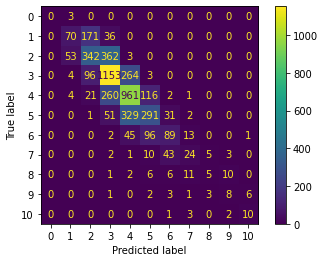

In [34]:
model1 = LogisticRegression(max_iter=10000)
model1.fit(X_train, y_train)
predict2_y =model1.predict(X_test)
score2=accuracy_score(y_test, predict2_y)
print(f'Logistic regression Success Rate: {score2*100:0.4f} %')
plot_confusion_matrix(model1, X_test, y_test)
plt.show()

kNN success rate: 78.3746 %


d:\OneDrive\Data\1_Work\H2\1_H2 Projects\pyTorch\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



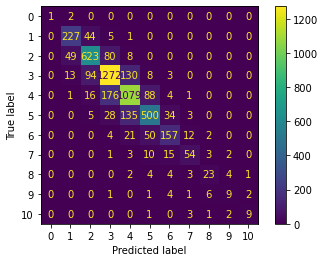

In [44]:
model2=KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)
predict3_y = model2.predict(X_test)
score3 = accuracy_score(y_test,predict3_y)
print(f'kNN success rate: {score3*100:0.4f} %')
plot_confusion_matrix(model2, X_test, y_test)
plt.show()

Random Forrest success rate: 85.9267 %


d:\OneDrive\Data\1_Work\H2\1_H2 Projects\pyTorch\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



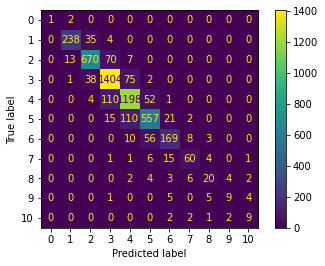

In [46]:
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train, y_train)
predict5_y = model3.predict(X_test)
score5 = accuracy_score(y_test, predict5_y)
print(f'Random Forrest success rate: {score5*100:0.4f} %')
plot_confusion_matrix(model3, X_test, y_test)
plt.show()

MLP success rate: 62.6363 %


d:\OneDrive\Data\1_Work\H2\1_H2 Projects\pyTorch\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



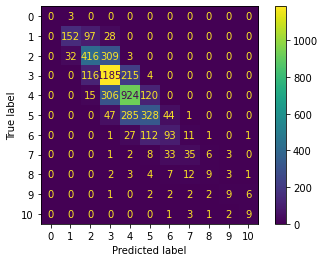

In [48]:
model6 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1, max_iter=10000)
model6.fit(X_train, y_train)
predict6_y = model6.predict(X_test)
score6 = accuracy_score(y_test, predict6_y)
print(f'MLP success rate: {score6*100:0.4f} %')
plot_confusion_matrix(model6, X_test, y_test)
plt.show()

SVM success rate: 65.9663 %


d:\OneDrive\Data\1_Work\H2\1_H2 Projects\pyTorch\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



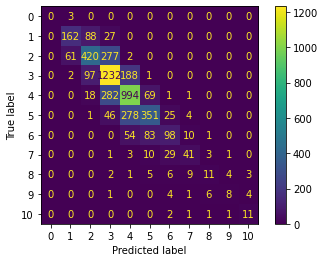

In [49]:
model4 = SVC()
model4.fit(X_train, y_train)
predict4_y = model4.predict(X_test)
score4 = accuracy_score(y_test, predict4_y)
print(f'SVM success rate: {score4*100:0.4f} %')
plot_confusion_matrix(model4, X_test, y_test)
plt.show()